<a href="https://colab.research.google.com/github/Ravikumar10593-hub/15daybootcamp/blob/main/Day3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ipl dataset analysis



1.   how many season
2.   no of match per season
3.   which team won max matches
4.   maximum toss winner 
5.   fav ground
6.   max man of the match
7.   is toss winner is game winner






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Let's load the dataset by using pandas

data=pd.read_csv("/content/ipl_matches.csv")
data.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
data.columns.value_counts()

winner             1
result             1
id                 1
team1              1
win_by_wickets     1
umpire2            1
umpire1            1
umpire3            1
season             1
venue              1
date               1
toss_winner        1
team2              1
city               1
player_of_match    1
win_by_runs        1
dl_applied         1
toss_decision      1
dtype: int64

In [11]:
data.shape

(636, 18)

In [13]:
#get all the null values
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

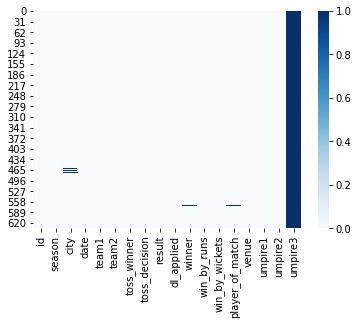

In [21]:
#create a heat map using null value
sns.heatmap(data.isnull(),cmap="Blues")

In [23]:
#umpire is fully null so we don't need that column
data.drop('umpire3',axis=1,inplace=True)
#alredy dropped

KeyError: ignored

In [24]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [25]:
data.dropna(axis=0,inplace=True)

In [27]:
data.shape
#(636, 18)

(625, 17)

In [28]:
#checking number of matches held in that season
data['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [29]:
data['season'].value_counts()

2013    76
2012    74
2011    72
2016    60
2010    60
2017    58
2008    58
2015    57
2009    57
2014    53
Name: season, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


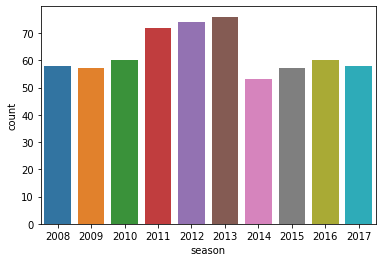

In [30]:
#plotting the season in the form of a count plot
sns.countplot(data['season'])

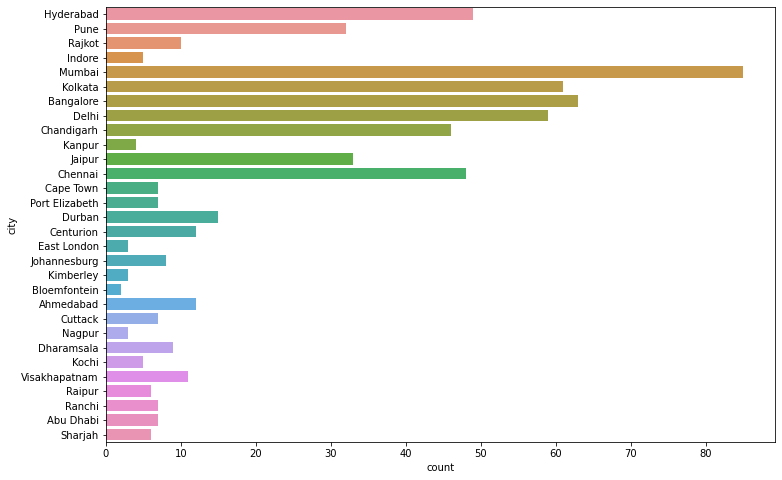

In [34]:
#number of city used for match hosting
plt.figure(figsize=(12,8))
#shiffting to y axis for good visualization
sns.countplot(y=data['city'])

In [38]:
df_1=data['city'].value_counts().reset_index().rename(columns={'index':'city','city':'number_of_matches'})

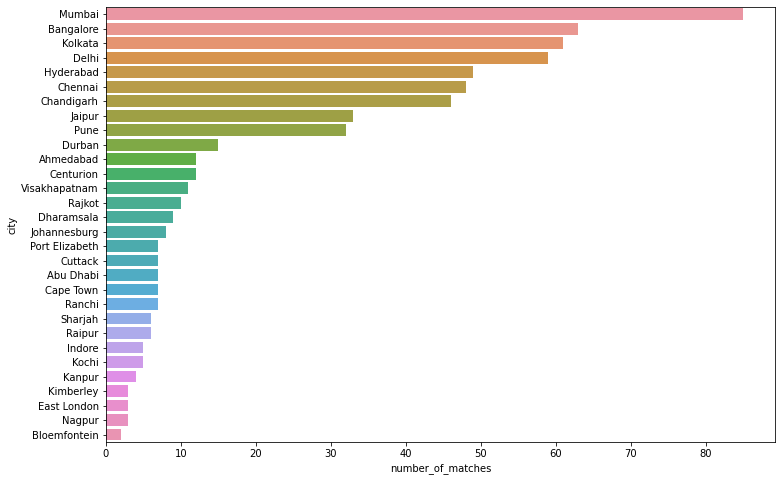

In [39]:
plt.figure(figsize=(12,8))
sns.barplot(y='city',x='number_of_matches',data=df_1)

In [41]:
#highest win by run
data['win_by_runs'].max()

146

In [42]:
#lets find which team did it
data[data['win_by_runs']==146][['season','city','team1','team2','win_by_runs','winner']]

,season,city,team1,team2,win_by_runs,winner
43,2017,Delhi,Mumbai Indians,Delhi Daredevils,146,Mumbai Indians


In [43]:
#how many time each time won
data['winner'].value_counts()

Mumbai Indians                 92
Kolkata Knight Riders          77
Chennai Super Kings            77
Royal Challengers Bangalore    71
Kings XI Punjab                69
Rajasthan Royals               63
Delhi Daredevils               61
Sunrisers Hyderabad            40
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

In [45]:
# rename 'Delhi Daredevils'  to 'delhi capital'
data.replace('Delhi Daredevils','Delhi capital',inplace=True)

In [46]:
data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi capital,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan


In [47]:
#checking how much time each won the toss
data['toss_winner'].value_counts()

Mumbai Indians                 83
Kolkata Knight Riders          77
Delhi capital                  71
Kings XI Punjab                67
Royal Challengers Bangalore    67
Chennai Super Kings            66
Rajasthan Royals               61
Deccan Chargers                43
Sunrisers Hyderabad            34
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [48]:
#umpire 
data['umpire2'].value_counts()

SJA Taufel         54
C Shamshuddin      50
S Ravi             47
RJ Tucker          37
CK Nandan          36
RB Tiffin          30
VA Kulkarni        27
SK Tarapore        26
BNJ Oxenford       25
AM Saheba          23
RE Koertzen        21
M Erasmus          20
DJ Harper          18
HDPK Dharmasena    14
AK Chaudhary       14
K Srinath          13
SL Shastri         13
NJ Llong           13
K Hariharan        11
S Asnani           11
CB Gaffaney        10
VK Sharma           9
Nitin Menon         8
BR Doctrove         8
PR Reiffel          8
IL Howell           7
RK Illingworth      7
I Shivram           6
AL Hill             6
GA Pratapkumar      6
SS Hazare           6
S Das               5
PG Pathak           5
TH Wijewardene      5
A Nand Kishore      5
AV Jayaprakash      4
BG Jerling          4
A Deshmukh          3
SD Ranade           2
MR Benson           2
K Srinivasan        2
SJ Davis            1
Subroto Das         1
SD Fry              1
JD Cloete           1
Name: umpi